In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn
import scipy

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


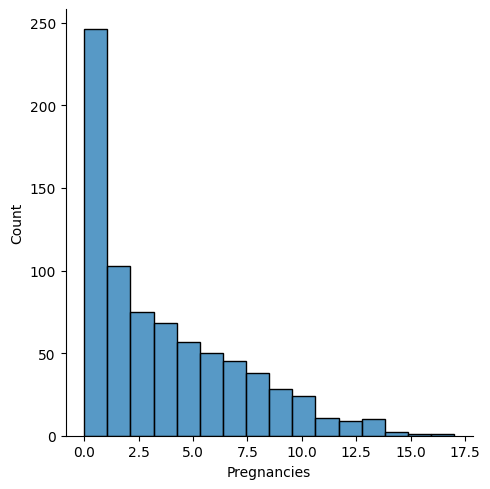

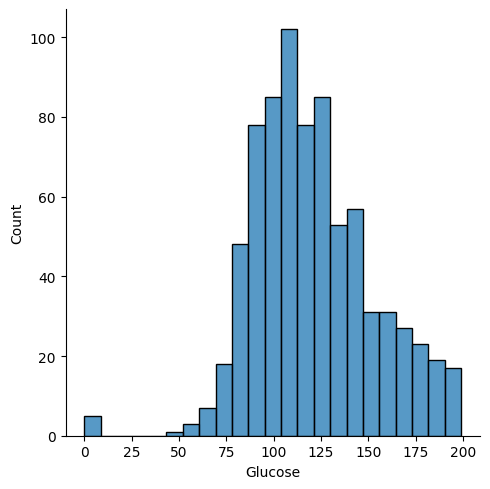

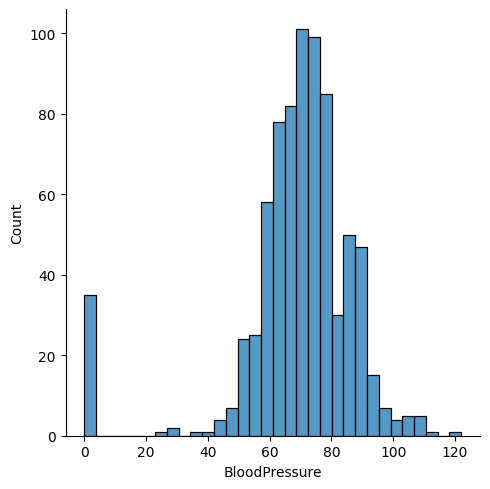

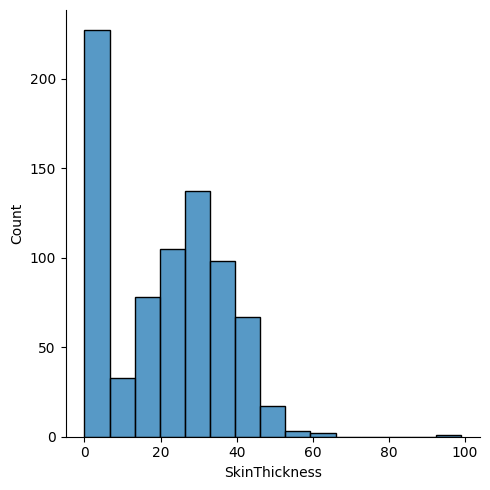

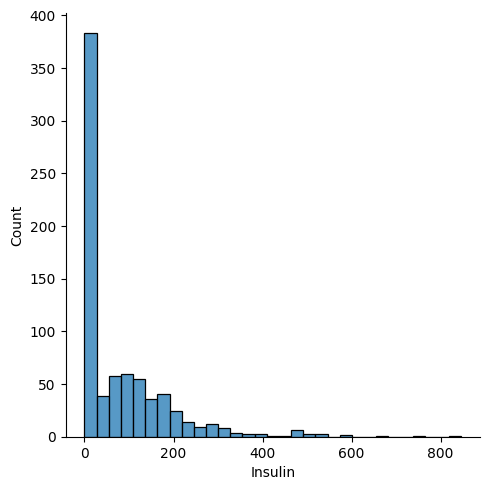

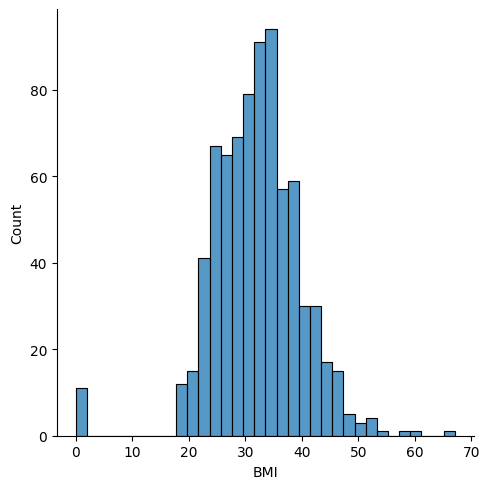

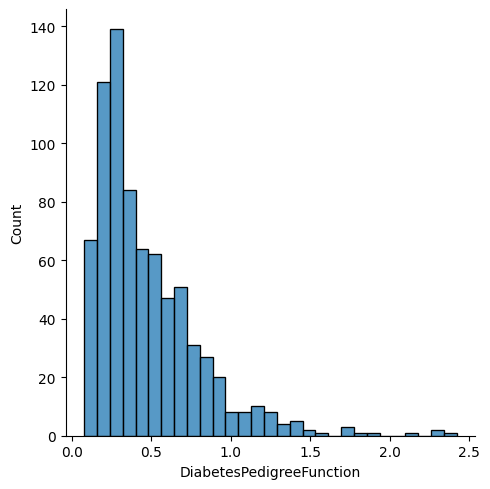

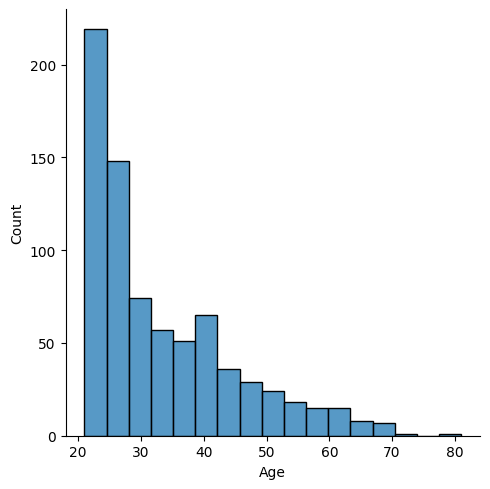

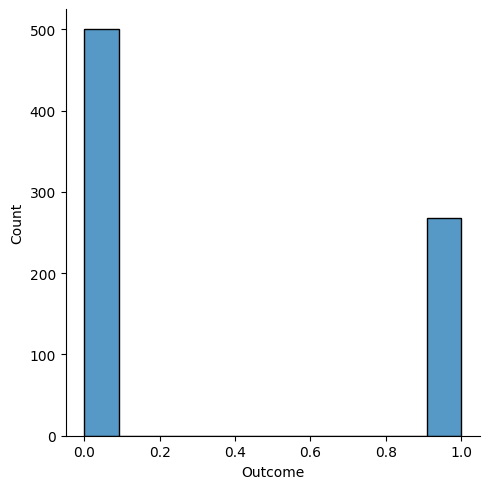

In [10]:
df_columns = df.columns
for i in df_columns:
    p = sns.displot(df[i])
    plt.show()

Columns like Glucose, BloodPressure, SkinThickness, Insulin, BMI cannot be zero for a human, So we are changing the values to nan. Later filling the nan with mean values.

In [16]:
df.Glucose = np.where((df.Glucose == 0), np.nan, df.Glucose)
df.BloodPressure = np.where((df.BloodPressure == 0), np.nan, df.BloodPressure)
df.SkinThickness = np.where((df.SkinThickness == 0), np.nan, df.SkinThickness)
df.Insulin = np.where((df.Insulin == 0), np.nan, df.Insulin)
df.BMI = np.where((df.BMI == 0), np.nan, df.BMI)


In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
df.Glucose = df.Glucose.fillna(df.Glucose.mean())
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

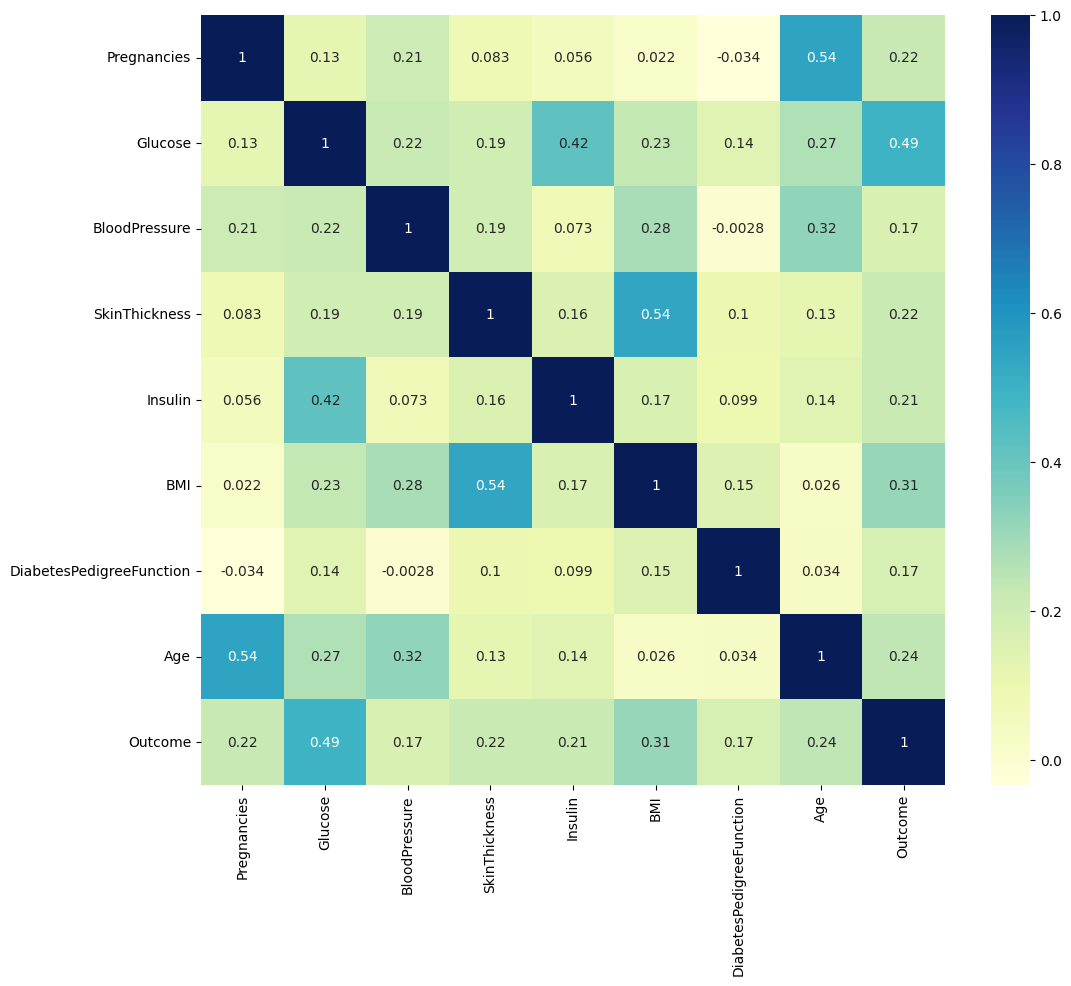

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Heatmap show no multicollinearity problem 
So lets move on to build ML model.

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [27]:
y = df.Outcome
x = df.drop(columns = ['Outcome'])

In [28]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Spliting the data into train and test set

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, random_state = 3)

In [36]:
# SVM Classifier
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf', random_state = 1)
svm_model.fit(xtrain, ytrain)
svm_ypred = svm_model.predict(xtest)
svm_test_score = svm_model.score(xtest, ytest)
svm_train_score = svm_model.score(xtrain, ytrain)
svm_train_score, svm_test_score

(0.7833876221498371, 0.6753246753246753)

In [39]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(metric = 'minkowski', p = 2)
knn_model.fit(xtrain, ytrain)
knn_ypred = knn_model.predict(xtest)
knn_test_score = knn_model.score(xtest, ytest)
knn_train_score = knn_model.score(xtrain, ytrain)
knn_train_score, knn_test_score

(0.7931596091205212, 0.6428571428571429)

In [41]:
# Naive-Bayes Classifier
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(xtrain, ytrain)
naive_ypred = naive_model.predict(xtest)
naive_test_score = naive_model.score(xtest, ytest)
naive_train_score = naive_model.score(xtrain, ytrain)
naive_train_score, naive_test_score

(0.760586319218241, 0.7337662337662337)

In [42]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
decision_model.fit(xtrain, ytrain)
decision_ypred = decision_model.predict(xtest)
decision_test_score = decision_model.score(xtest, ytest)
decision_train_score = decision_model.score(xtrain, ytrain)
decision_train_score, decision_test_score

(1.0, 0.6753246753246753)

In [43]:
# RandomTree Classifier
from random import random
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(criterion = 'entropy', random_state = 2)
random_model.fit(xtrain, ytrain)
random_ypred = random_model.predict(xtest)
random_train_score = random_model.score(xtrain, ytrain)
random_test_score = random_model.score(xtest, ytest)
random_train_score, random_test_score

(1.0, 0.7402597402597403)

Looks like RandomForest Classifier Test score is the best among all the models tested. 

In [45]:
# Performance Metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, random_ypred)
cm

array([[79, 13],
       [27, 35]], dtype=int64)

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, random_ypred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        92
           1       0.73      0.56      0.64        62

    accuracy                           0.74       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.74      0.73       154



In [49]:
# Probablity
ypred_prob = random_model.predict_proba(xtest)[:, 1]
ypred_prob

array([0.  , 0.63, 0.  , 0.68, 0.3 , 0.32, 0.34, 0.01, 0.1 , 0.33, 0.24,
       0.17, 0.24, 0.77, 0.7 , 0.07, 0.04, 0.  , 0.54, 0.43, 0.14, 0.05,
       0.16, 0.17, 0.01, 0.95, 0.19, 0.18, 0.71, 0.13, 0.85, 0.18, 0.1 ,
       0.08, 0.3 , 0.12, 0.29, 0.4 , 0.38, 0.71, 0.76, 0.07, 0.32, 0.29,
       0.13, 0.56, 0.11, 0.49, 0.76, 0.31, 0.64, 0.5 , 0.15, 0.66, 0.32,
       0.18, 0.29, 0.54, 0.21, 0.35, 0.8 , 0.02, 0.35, 0.62, 0.43, 0.82,
       0.82, 0.59, 0.15, 0.41, 0.81, 0.16, 0.01, 0.43, 0.09, 0.82, 0.09,
       0.  , 0.03, 0.14, 0.62, 0.78, 0.02, 0.91, 0.65, 0.08, 0.21, 0.18,
       0.23, 0.02, 0.42, 0.88, 0.63, 0.13, 0.27, 0.14, 0.46, 0.24, 0.93,
       0.01, 0.03, 0.83, 0.13, 0.85, 0.1 , 0.09, 0.27, 0.85, 0.3 , 0.33,
       0.23, 0.04, 0.85, 0.43, 0.36, 0.53, 0.91, 0.79, 0.85, 0.13, 0.07,
       0.11, 0.01, 0.59, 0.11, 0.49, 0.18, 0.68, 0.12, 0.71, 0.74, 0.16,
       0.84, 0.16, 0.4 , 0.09, 0.61, 0.76, 0.02, 0.03, 0.06, 0.12, 0.17,
       0.01, 0.52, 0.01, 0.78, 0.64, 0.07, 0.48, 0.

In [53]:
# FPR, TPR, Threshold
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(ytest,ypred_prob)

0.8061009817671808

In [55]:
# Hyperparameter Tunning
from sklearn.model_selection import cross_val_score
cross_val_score(estimator = random_model, X = xtrain, y = ytrain, cv = 5)

array([0.81300813, 0.74796748, 0.71544715, 0.75609756, 0.78688525])

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
    'n_estimators' : [25,50,200,300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [14,20,25,30]
}

In [58]:
gridcv = GridSearchCV(estimator = random_model, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = gridcv.fit(xtrain, ytrain)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300}

In [64]:
randommodel = RandomForestClassifier(criterion = 'gini', max_depth = 30, n_estimators = 300)
randommodel.fit(xtrain, ytrain)
randomypred = randommodel.predict(xtestt)
randommodel.score(xtrain, ytrain), randommodel.score(xtest, ytest)

(1.0, 0.7467532467532467)

In [65]:
print(classification_report(ytest, randomypred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        92
           1       0.74      0.56      0.64        62

    accuracy                           0.75       154
   macro avg       0.75      0.72      0.72       154
weighted avg       0.75      0.75      0.74       154



In [ ]:
# importing the model using pickle
pickle.dump(randommodel, open('randomclassi','wb'))
